In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, spearmanr, kruskal
import scikit_posthocs as sp
from matplotlib import transforms

#plt.rcParams['figure.dpi'] = 600 #necessary for plddt-correlation plots with colourd x-axis


In [2]:
# Load prediction data
dn = pd.read_csv("Data/de_novo_proteins_data.csv", index_col=0)
dn=dn[(dn["mechanism"] == "denovo") | (dn["mechanism"] == "denovo-intron")]

est = pd.read_csv("Data/established_proteins_data.csv", index_col=0)
est = est[est["isDeNovo"] == False]

rd = pd.read_csv("Data/random_sequences_data.csv", index_col=0)
disprot = pd.read_csv("Data/disprot_full_dataset.csv", index_col=0) 


#pLDDT
pLDDT = pd.DataFrame()
pLDDT["Random"] = rd["max_pLDDT"]
pLDDT["De Novo"] = dn["max_pLDDT"]
pLDDT["Established Proteins"] = est["pLDDT"]
pLDDT["DisProt"] = disprot["pLDDT"]


#Diorder predictions - flDPnn
disorder = pd.DataFrame()
disorder["Random"] = rd["fraction_disorder_fldpnn"]
disorder["De Novo"] = dn["fraction_disorder_fldpnn"]
disorder["Established Proteins"] = est["fraction_disorder_fldpnn"]
disorder["DisProt"] = disprot["fraction_disorder_fldpnn"]

#Disorder predictions - Iupred3L
disorder_iupred = pd.DataFrame()
disorder_iupred["Random"] = rd["fraction_disorder_Iupred3"]
disorder_iupred["De Novo"] = dn["fraction_disorder_Iupred3"]
disorder_iupred["Established Proteins"] = est["fraction_disorder_Iupred3"]
disorder_iupred["DisProt"] = disprot["fraction_disorder_Iupred3"]


#Combined secondary structure AlphaFold Models
af_secondary = pd.DataFrame()
af_secondary["Random"] = rd["alpha_content_AF"] + rd["beta_content_AF"]
af_secondary["De Novo"] = dn["alpha_content_AF"] + dn["beta_content_AF"]
af_secondary["Established Proteins"] = est["alpha_content_AF"] + est["beta_content_AF"]


#disorder - pLDDT correlation
pd_correlation = pd.DataFrame()
pd_correlation["pLDDT_random"] = pLDDT["Random"]
pd_correlation["pLDDT_denovo"] = pLDDT["De Novo"]
pd_correlation["pLDDT_est"] = pLDDT["Established Proteins"]
pd_correlation["Disorder_random"] = disorder["Random"]
pd_correlation["Disorder_denovo"] = disorder["De Novo"]
pd_correlation["Disorder_est"] = disorder["Established Proteins"]
pd_correlation["DisProt"] = disorder["DisProt"]
pd_correlation["DisProt_pLDDT"] = pLDDT["DisProt"]

# disorder Iupred3L - pLDDT correlation
pd_correlation_iupred = pd.DataFrame()
pd_correlation_iupred["pLDDT_random"] = pLDDT["Random"]
pd_correlation_iupred["pLDDT_denovo"] = pLDDT["De Novo"]
pd_correlation_iupred["pLDDT_est"] = pLDDT["Established Proteins"]
pd_correlation_iupred["Disorder_random"] = disorder_iupred["Random"]
pd_correlation_iupred["Disorder_denovo"] = disorder_iupred["De Novo"]
pd_correlation_iupred["Disorder_est"] = disorder_iupred["Established Proteins"]

#Combined secondary strucutre - pLDDT correlation
ssp_correlation = pd.DataFrame()
ssp_correlation["pLDDT_random"] = pLDDT["Random"]
ssp_correlation["pLDDT_denovo"] = pLDDT["De Novo"]
ssp_correlation["pLDDT_est"] = pLDDT["Established Proteins"]
ssp_correlation["ss_random"] = af_secondary["Random"]
ssp_correlation["ss_denovo"] = af_secondary["De Novo"]
ssp_correlation["ss_est"] = af_secondary["Established Proteins"]


---P-values disorder - pLDDT---
Random Sequences: 5.162061022564878e-92
De novo: 1.6710002738485475e-25
Established Proteins: 3.2912179428342654e-25
DisProt: 5.9316786718752875e-75 

---P-values alpha-helices - pLDDT---
Random Sequences: 2.2851293716274798e-49
De novo: 2.1462676098337284e-115
Established Proteins: 5.407843704522488e-40
DisProt: 1.803674399839498e-40 

---P-values beta-sheets - pLDDT---
Random Sequences: 4.3937509259233263e-82
De novo: 6.433775478137247e-93
Established Proteins: 8.029462353634981e-60
DisProt: 3.795663714101304e-109 



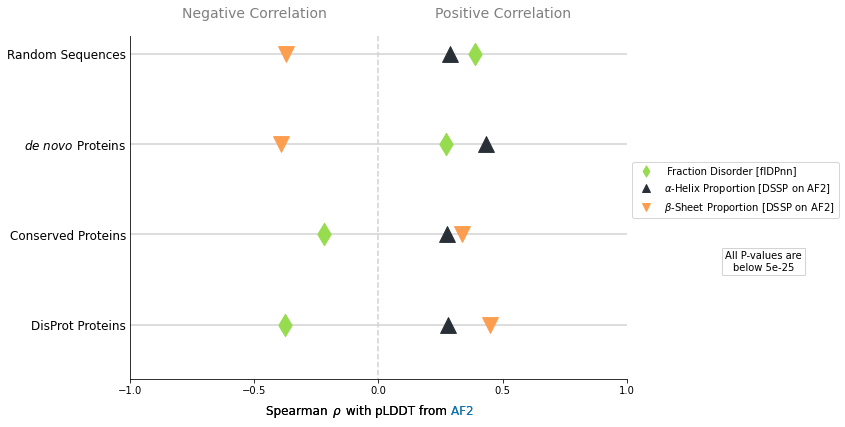

In [3]:
#Calculate data
rd_disorder = spearmanr(pd_correlation["Disorder_random"], pd_correlation["pLDDT_random"], nan_policy="omit")
dn_disorder = spearmanr(pd_correlation["Disorder_denovo"], pd_correlation["pLDDT_denovo"], nan_policy="omit")
est_disorder = spearmanr(pd_correlation["Disorder_est"], pd_correlation["pLDDT_est"], nan_policy="omit")
disprot_disorder = spearmanr(pd_correlation["DisProt"], pd_correlation["DisProt_pLDDT"], nan_policy="omit")

rd_alpha  =spearmanr(rd["alpha_content_AF"], rd["max_pLDDT"], nan_policy="omit")
dn_alpha  =spearmanr(dn["alpha_content_AF"], dn["max_pLDDT"], nan_policy="omit")
est_alpha  =spearmanr(est["alpha_content_AF"], est["pLDDT"], nan_policy="omit")
disprot_alpha = spearmanr(disprot["alpha_content_AF"], disprot["pLDDT"], nan_policy="omit")

rd_beta = spearmanr(rd["beta_content_AF"], rd["max_pLDDT"], nan_policy="omit")
dn_beta = spearmanr(dn["beta_content_AF"], dn["max_pLDDT"], nan_policy="omit")
est_beta = spearmanr(est["beta_content_AF"], est["pLDDT"], nan_policy="omit")
disprot_beta = spearmanr(disprot["beta_content_AF"], disprot["pLDDT"], nan_policy="omit")

disorder_corr = [disprot_disorder.correlation, est_disorder.correlation, dn_disorder.correlation, rd_disorder.correlation]
alpha_corr = [disprot_alpha.correlation, est_alpha.correlation, dn_alpha.correlation, rd_alpha.correlation]
beta_corr = [disprot_beta.correlation, est_beta.correlation, dn_beta.correlation, rd_beta.correlation]

#---Print P-Values---#
print("---P-values disorder - pLDDT---")
print(f"Random Sequences: {rd_disorder.pvalue}")
print(f"De novo: {dn_disorder.pvalue}")
print(f"Established Proteins: {est_disorder.pvalue}")
print(f"DisProt: {disprot_disorder.pvalue} \n")

print("---P-values alpha-helices - pLDDT---")
print(f"Random Sequences: {rd_alpha.pvalue}")
print(f"De novo: {dn_alpha.pvalue}")
print(f"Established Proteins: {est_alpha.pvalue}")
print(f"DisProt: {disprot_alpha.pvalue} \n")

print("---P-values beta-sheets - pLDDT---")
print(f"Random Sequences: {rd_beta.pvalue}")
print(f"De novo: {dn_beta.pvalue}")
print(f"Established Proteins: {est_beta.pvalue}")
print(f"DisProt: {disprot_beta.pvalue} \n")

#---Create figure---#
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

#Plot lines
ax.plot([-1, 1], [1/4, 1/4], color="lightgray", zorder=0.9)
ax.plot([-1, 1], [2/4, 2/4], color="lightgray", zorder=0.9)
ax.plot([-1, 1], [3/4, 3/4], color="lightgray", zorder=0.9)
ax.plot([-1, 1], [1, 1], color="lightgray", zorder=0.9)
ax.plot([0,0], [0, 1.05], "--", color="lightgray")

#Plot data
ax.scatter(disorder_corr, [1/4, 2/4, 3/4, 1], marker="d", c="#97DB4F", label=" Fraction Disorder [flDPnn]", s=250)
ax.scatter(alpha_corr, [1/4, 2/4, 3/4, 1], marker="^", color="#292F36", label=r"$\alpha$-Helix Proportion [DSSP on AF2]", s=250)
ax.scatter(beta_corr, [1/4, 2/4, 3/4, 1], marker="v", color="#FC9E4F", label=r"$\beta$-Sheet Proportion [DSSP on AF2]", s=250)

#Adjust axis
ax.set_ylim(0.1,1.05)
ax.set_xlim(-1, 1)

ax.xaxis.set_ticks([-1, -0.5, 0, 0.5, 1])

ax.yaxis.set_ticks([1/4, 2/4, 3/4, 1])
ax.set_yticklabels([ "DisProt Proteins","Conserved Proteins", r"$\it{de}$ $\it{novo}$ Proteins", "Random Sequences"])
ax.yaxis.set_tick_params("major", length=0, labelsize=12)


# Add additional lableing
ax.legend(loc='center left', bbox_to_anchor=(1, 0.55), markerscale=0.5)

ax.text(-0.5, 1.1, "Negative Correlation", ha="center", fontdict={"color": "gray", "size": 14})
ax.text(0.5, 1.1, "Positive Correlation", ha="center", fontdict={"color": "gray", "size": 14})
#ax.text(0, 1.2, "AlphaFold2", ha="center", fontdict={"color": "#1273AD", "size": 16})

ax.text(1.55, 0.4, "All P-values are\nbelow 5e-25", ha="center", bbox=dict(boxstyle="square,pad=0.3", fc="None", ec="lightgray"))

def rainbow_text(x,y,ls,lc,**kw):
    """
    Take a list of strings ``ls`` and colors ``lc`` and place them next to each
    other, with text ls[i] being shown in color lc[i].

    This example shows how to do both vertical and horizontal text, and will
    pass all keyword arguments to plt.text, so you can set the font size,
    family, etc.
    """
    t = plt.gca().transData
    fig = plt.gcf()

    #horizontal version
    for s,c in zip(ls,lc):
        text = plt.text(x,y,s+" ",color=c, transform=t, **kw)
        text.draw(fig.canvas.get_renderer())
        ex = text.get_window_extent()
        t = transforms.offset_copy(text._transform, x=ex.width, units='dots')



#ax.set_xlabel(r"Spearman $\rho$ with pLDDT from AF2", fontdict={"size": 12})

rainbow_text(-0.45, 0, ["Spearman", r"$\rho$",  " with", "pLDDT", "from", "AF2"], ["black", "black", "black", "black","black", "#1273AD"], size=12)

# Additional option for styling
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()


rainbow_text(-0.45, 0, ["Spearman", r"$\rho$",  " with", "pLDDT", "from", "AF2"], ["black", "black", "black", "black","black", "#1273AD"], size=12)


---P-values disorder - pLDDT---
Random Sequences: 1.2437761684843933e-17
De novo: 2.242863884321914e-07
Established Proteins: 6.468258723693003e-47 

---P-values alpha-helices - pLDDT---
Random Sequences: 2.2851293716274798e-49
De novo: 2.1462676098337284e-115
Established Proteins: 5.407843704522488e-40 

---P-values beta-sheets - pLDDT---
Random Sequences: 4.3937509259233263e-82
De novo: 6.433775478137247e-93
Established Proteins: 8.029462353634981e-60 



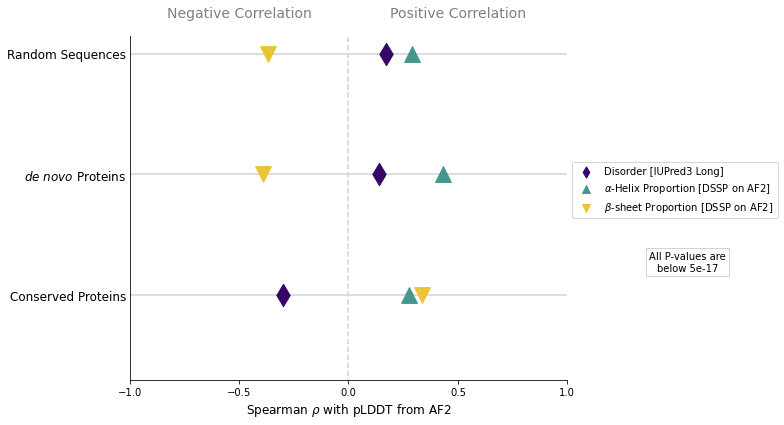

In [4]:
#########################################
###Same plot with Iupred3L Disorder####
#########################################

#Calculate data
rd_disorder = spearmanr(pd_correlation_iupred["Disorder_random"], pd_correlation_iupred["pLDDT_random"], nan_policy="omit")
dn_disorder = spearmanr(pd_correlation_iupred["Disorder_denovo"], pd_correlation_iupred["pLDDT_denovo"], nan_policy="omit")
est_disorder = spearmanr(pd_correlation_iupred["Disorder_est"], pd_correlation_iupred["pLDDT_est"], nan_policy="omit")

rd_alpha  =spearmanr(rd["alpha_content_AF"], rd["max_pLDDT"], nan_policy="omit")
dn_alpha  =spearmanr(dn["alpha_content_AF"], dn["max_pLDDT"], nan_policy="omit")
est_alpha  =spearmanr(est["alpha_content_AF"], est["pLDDT"], nan_policy="omit")

rd_beta = spearmanr(rd["beta_content_AF"], rd["max_pLDDT"], nan_policy="omit")
dn_beta = spearmanr(dn["beta_content_AF"], dn["max_pLDDT"], nan_policy="omit")
est_beta = spearmanr(est["beta_content_AF"], est["pLDDT"], nan_policy="omit")

disorder_corr = [est_disorder.correlation, dn_disorder.correlation, rd_disorder.correlation]
alpha_corr = [est_alpha.correlation, dn_alpha.correlation, rd_alpha.correlation]
beta_corr = [est_beta.correlation, dn_beta.correlation, rd_beta.correlation]

#---Print P-Values---#
print("---P-values disorder - pLDDT---")
print(f"Random Sequences: {rd_disorder.pvalue}")
print(f"De novo: {dn_disorder.pvalue}")
print(f"Established Proteins: {est_disorder.pvalue} \n")

print("---P-values alpha-helices - pLDDT---")
print(f"Random Sequences: {rd_alpha.pvalue}")
print(f"De novo: {dn_alpha.pvalue}")
print(f"Established Proteins: {est_alpha.pvalue} \n")

print("---P-values beta-sheets - pLDDT---")
print(f"Random Sequences: {rd_beta.pvalue}")
print(f"De novo: {dn_beta.pvalue}")
print(f"Established Proteins: {est_beta.pvalue} \n")

#---Create figure---#
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot()

#Plot lines
ax.plot([-1, 1], [1/3, 1/3], color="lightgray", zorder=0.9)
ax.plot([-1, 1], [2/3, 2/3], color="lightgray", zorder=0.9)
ax.plot([-1, 1], [1, 1], color="lightgray", zorder=0.9)
ax.plot([0,0], [0, 1.05], "--", color="lightgray")

#Plot data
ax.scatter(disorder_corr, [1/3, 2/3, 1], marker="d", c="#360568", label="Disorder [IUPred3 Long]", s=250)
ax.scatter(alpha_corr, [1/3, 2/3, 1], marker="^", color="#43978D", label=r"$\alpha$-Helix Proportion [DSSP on AF2]", s=250)
ax.scatter(beta_corr, [1/3, 2/3, 1], marker="v", color="#EAC435", label=r"$\beta$-sheet Proportion [DSSP on AF2]", s=250)

#Adjust axis
ax.set_ylim(0.1,1.05)
ax.set_xlim(-1, 1)

ax.xaxis.set_ticks([-1, -0.5, 0, 0.5, 1])

ax.yaxis.set_ticks([1/3, 2/3, 1])
ax.set_yticklabels(["Conserved Proteins", r"$\it{de}$ $\it{novo}$ Proteins", "Random Sequences"])
ax.yaxis.set_tick_params("major", length=0, labelsize=12)


# Add additional lableing
ax.legend(loc='center left', bbox_to_anchor=(1, 0.55), markerscale=0.5)

ax.text(-0.5, 1.1, "Negative Correlation", ha="center", fontdict={"color": "gray", "size": 14})
ax.text(0.5, 1.1, "Positive Correlation", ha="center", fontdict={"color": "gray", "size": 14})

ax.text(1.55, 0.4, "All P-values are\nbelow 5e-17", ha="center", bbox=dict(boxstyle="square,pad=0.3", fc="None", ec="lightgray"))



ax.set_xlabel(r"Spearman $\rho$ with pLDDT from AF2", fontdict={"size": 12})

# Additional option for styling
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()

---P-values disorder - pLDDT---
Random Sequences: 5.236466258858531e-113
De novo: 6.059014850337636e-55
Established Proteins: 3.2912179428342654e-25 

---P-values alpha-helices - pLDDT---
Random Sequences: 4.415604055244482e-09
De novo: 3.882862378984359e-52
Established Proteins: 4.610063044200921e-34 

---P-values beta-sheets - pLDDT---
Random Sequences: 2.3401017509048178e-66
De novo: 5.661213535829849e-42
Established Proteins: 5.899033490765414e-70 



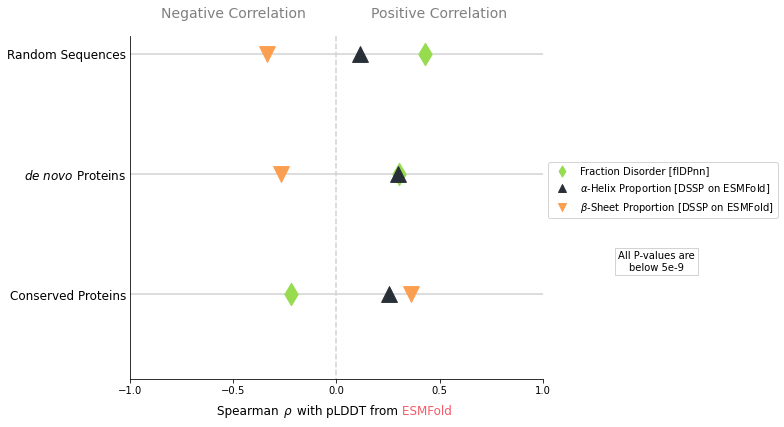

In [5]:
#Calculate correlations with data from ESMFold models

rd_disorder = spearmanr(rd["fraction_disorder_fldpnn"], rd["pLDDT_ESM"], nan_policy="omit")
dn_disorder = spearmanr(dn["fraction_disorder_fldpnn"], dn["pLDDT_ESM"], nan_policy="omit")
est_disorder = spearmanr(est["fraction_disorder_fldpnn"], est["pLDDT"], nan_policy="omit")

rd_alpha  =spearmanr(rd["alpha_content_ESM"], rd["pLDDT_ESM"], nan_policy="omit")
dn_alpha  =spearmanr(dn["alpha_content_ESM"], dn["pLDDT_ESM"], nan_policy="omit")
est_alpha  =spearmanr(est["alpha_content_ESM"], est["pLDDT_ESM"], nan_policy="omit")

rd_beta = spearmanr(rd["beta_content_ESM"], rd["pLDDT_ESM"], nan_policy="omit")
dn_beta = spearmanr(dn["beta_content_ESM"], dn["pLDDT_ESM"], nan_policy="omit")
est_beta = spearmanr(est["beta_content_ESM"], est["pLDDT_ESM"], nan_policy="omit")

disorder_corr = [est_disorder.correlation, dn_disorder.correlation, rd_disorder.correlation]
alpha_corr = [est_alpha.correlation, dn_alpha.correlation, rd_alpha.correlation]
beta_corr = [est_beta.correlation, dn_beta.correlation, rd_beta.correlation]

#---Print P-Values---#
print("---P-values disorder - pLDDT---")
print(f"Random Sequences: {rd_disorder.pvalue}")
print(f"De novo: {dn_disorder.pvalue}")
print(f"Established Proteins: {est_disorder.pvalue} \n")

print("---P-values alpha-helices - pLDDT---")
print(f"Random Sequences: {rd_alpha.pvalue}")
print(f"De novo: {dn_alpha.pvalue}")
print(f"Established Proteins: {est_alpha.pvalue} \n")

print("---P-values beta-sheets - pLDDT---")
print(f"Random Sequences: {rd_beta.pvalue}")
print(f"De novo: {dn_beta.pvalue}")
print(f"Established Proteins: {est_beta.pvalue} \n")

#---Create figure---#
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot()

#Plot lines
ax.plot([-1, 1], [1/3, 1/3], color="lightgray", zorder=0.9)
ax.plot([-1, 1], [2/3, 2/3], color="lightgray", zorder=0.9)
ax.plot([-1, 1], [1, 1], color="lightgray", zorder=0.9)
ax.plot([0,0], [0, 1.05], "--", color="lightgray")

#Plot data
ax.scatter(disorder_corr, [1/3, 2/3, 1], marker="d", c="#97DB4F", label="Fraction Disorder [flDPnn]", s=250)
ax.scatter(alpha_corr, [1/3, 2/3, 1], marker="^", color="#292F36", label=r"$\alpha$-Helix Proportion [DSSP on ESMFold]", s=250)
ax.scatter(beta_corr, [1/3, 2/3, 1], marker="v", color="#FC9E4F", label=r"$\beta$-Sheet Proportion [DSSP on ESMFold]", s=250)

#Adjust axis
ax.set_ylim(0.1,1.05)
ax.set_xlim(-1, 1)

ax.xaxis.set_ticks([-1, -0.5, 0, 0.5, 1])

ax.yaxis.set_ticks([1/3, 2/3, 1])
ax.set_yticklabels(["Conserved Proteins", r"$\it{de}$ $\it{novo}$ Proteins", "Random Sequences"])
ax.yaxis.set_tick_params("major", length=0, labelsize=12)


# Add additional lableing
ax.legend(loc='center left', bbox_to_anchor=(1, 0.55), markerscale=0.5)

ax.text(-0.5, 1.1, "Negative Correlation", ha="center", fontdict={"color": "gray", "size": 14})
ax.text(0.5, 1.1, "Positive Correlation", ha="center", fontdict={"color": "gray", "size": 14})
#ax.text(0, 1.2, "ESMFold", ha="center", fontdict={"size": 16, "color": "#F45B69"})

ax.text(1.55, 0.4, "All P-values are\nbelow 5e-9", ha="center", bbox=dict(boxstyle="square,pad=0.3", fc="None", ec="lightgray"))



#ax.set_xlabel(r"Spearman $\rho$ with pLDDT from ESMFold", fontdict={"size": 12})


rainbow_text(-0.575, 0, ["Spearman", r"$\rho$",  " with", "pLDDT", "from", "ESMFold"], ["black", "black", "black", "black","black", "#F45B69"], size=12)


# Additional option for styling
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()

#plt.savefig("../manuscript_figures/pLDDT_correlations_ESMFold.png", dpi=600)

---
## Correlation of AlphaFold2 and SPIDER3-Single predictions

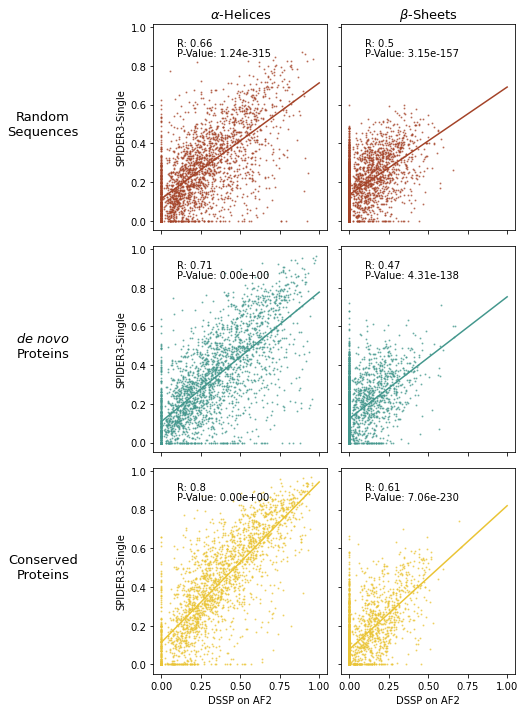

In [7]:
def plot_subplot(ax, AF2, S3S, color):
    """
    Plot a subplot with scatter points, linear regression line, and text annotations.

    Args:
        ax: Axes object for the subplot.
        AF2: Data for the AlphaFold models.
        S3S: Data of SPIDER3-Single predictions.
        color: Color for scatter points and regression line.
    """

    df = pd.DataFrame()
    df["AF2"] = AF2
    df["S3S"] = S3S
    df = df.dropna()

    # Perform linear regression and obtain slope, intercept, correlation coefficient (r),
    # p-value (p), and standard error (se)
    slope, intercept, r, p, se = linregress(df)

    # Generate y-values for the regression line using the slope and intercept
    yfit = [slope*x + intercept for x in np.arange(0, 1, 1/len(AF2))]

    # Scatter plot of AF2 vs. S3S with specified color, size, and transparency
    ax.scatter(AF2, S3S, color=color, s=1, alpha=0.6)

    # Plot the regression line using the generated y-values and specified color
    ax.plot(np.arange(0, 1, 1/len(AF2)), yfit, color=color)

    # Add text annotations for correlation coefficient (R) and p-value
    ax.text(0.1, 0.9, f"R: {round(r, 2)}")
    ax.text(0.1, 0.85, "P-Value: {:.2e}".format(p))

# Create a 3x2 grid of subplots with shared x-axis and y-axis
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(7.5, 10), sharex=True, sharey=True)

# Plot subplots for the "Random Sequences" group
plot_subplot(ax1, rd["alpha_content_AF"], rd["alpha_content_SPIDER3S"], color="#A44328")
plot_subplot(ax2, rd["beta_content_AF"], rd["beta_content_SPIDER3S"], color="#A44328")

# Plot subplots for the "de novo Proteins" group
plot_subplot(ax3, dn["alpha_content_AF"], dn["alpha_content_SPIDER3S"], color="#43978D")
plot_subplot(ax4, dn["beta_content_AF"], dn["beta_content_SPIDER3S"], color="#43978D")

# Plot subplots for the "Conserved Proteins" group
plot_subplot(ax5, est["alpha_content_AF"], est["alpha_content_SPIDER3S"], color="#EAC435")
plot_subplot(ax6, est["beta_content_AF"], est["beta_content_SPIDER3S"], color="#EAC435")

# Set titles for the first row of subplots
ax1.set_title(r"$\alpha$-Helices", fontdict={"size": 13})
ax2.set_title(r"$\beta$-Sheets", fontdict={"size": 13})

# Add text annotations for group names on the left side of each row
ax1.text(-0.75, 0.5, "Random\nSequences", ha="center", va="center", fontdict={"size": 13})
ax3.text(-0.75, 0.5, r"$\it{de}$ $\it{novo}$" +"\nProteins", ha="center", va="center", fontdict={"size": 13})
ax5.text(-0.75, 0.5, "Conserved\nProteins", ha="center", va="center",  fontdict={"size": 13})

# Set axis labels
ax1.set_ylabel("SPIDER3-Single")
ax3.set_ylabel("SPIDER3-Single")
ax5.set_ylabel("SPIDER3-Single")

ax5.set_xlabel("DSSP on AF2")
ax6.set_xlabel("DSSP on AF2")

plt.tight_layout()


---
## Correlation of flDPnn and Iupred3L Disorder

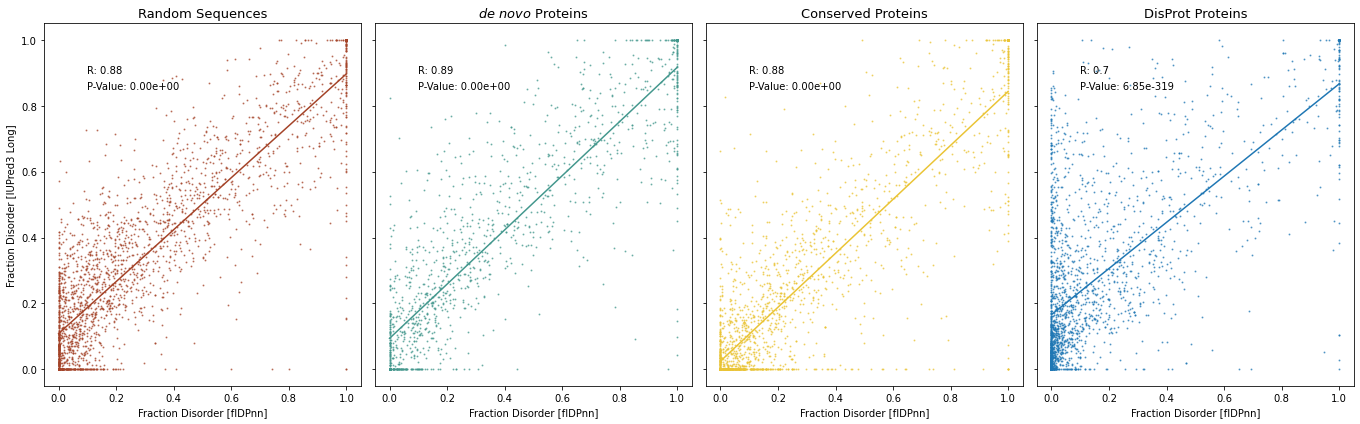

In [8]:
#Plot scatterplots and correlations for fraction disorder fldpnn and fraction disorder iupred3
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(19, 6), sharey=True)

#Plot scatterplots
ax1.scatter(disorder["Random"], disorder_iupred["Random"], s=1, alpha=0.6, c="#A44328")
ax2.scatter(disorder["De Novo"], disorder_iupred["De Novo"], s=1, alpha=0.6, c="#43978D")
ax3.scatter(disorder["Established Proteins"], disorder_iupred["Established Proteins"], s=1, alpha=0.6, c="#EAC435")
ax4.scatter(disorder["DisProt"], disorder_iupred["DisProt"], s=1, alpha=0.6)

#calculate linear regression
slope_rd, intercept_rd, r_rd, p_rd, se_rd = linregress(disorder["Random"].dropna(), disorder_iupred["Random"].dropna())
slope_dn, intercept_dn, r_dn, p_dn, se_dn = linregress(disorder["De Novo"].dropna(), disorder_iupred["De Novo"].dropna())
slope_est, intercept_est, r_est, p_est, se_est = linregress(disorder["Established Proteins"].dropna(), disorder_iupred["Established Proteins"].dropna())
slope_disprot, intercept_disprot, r_disprot, p_disprot, se_disprot = linregress(disorder["DisProt"].dropna(), disorder_iupred["DisProt"].dropna())

#plot linear regression
ax1.plot(np.arange(0,1, 1/len(disorder["Random"])), [slope_rd*x+intercept_rd for x in np.arange(0,1, 1/len(disorder["Random"]))], c="#A44328")
ax2.plot(np.arange(0,1, 1/len(disorder["De Novo"])), [slope_dn*x+intercept_dn for x in np.arange(0,1, 1/len(disorder["De Novo"]))], c="#43978D")
ax3.plot(np.arange(0,1, 1/len(disorder["Established Proteins"])), [slope_est*x+intercept_est for x in np.arange(0,1, 1/len(disorder["Established Proteins"]))], c="#EAC435")
ax4.plot(np.arange(0,1, 1/len(disorder["DisProt"])), [slope_disprot*x+intercept_disprot for x in np.arange(0,1, 1/len(disorder["DisProt"]))])

#add correlation and p-value to plot
ax1.text(0.1, 0.9, f"R: {round(r_rd, 2)}")
ax1.text(0.1, 0.85, "P-Value: {:.2e}".format(p_rd))
ax2.text(0.1, 0.9, f"R: {round(r_dn, 2)}")
ax2.text(0.1, 0.85, "P-Value: {:.2e}".format(p_dn))
ax3.text(0.1, 0.9, f"R: {round(r_est, 2)}")
ax3.text(0.1, 0.85, "P-Value: {:.2e}".format(p_est))
ax4.text(0.1, 0.9, f"R: {round(r_disprot, 2)}")
ax4.text(0.1, 0.85, "P-Value: {:.2e}".format(p_disprot))

#add titles
ax1.set_title("Random Sequences", fontdict={"size": 13})
ax2.set_title(r"$\it{de}$ $\it{novo}$ Proteins", fontdict={"size": 13})
ax3.set_title("Conserved Proteins", fontdict={"size": 13})
ax4.set_title("DisProt Proteins", fontdict={"size": 13})

#add axis labels
ax1.set_xlabel("Fraction Disorder [flDPnn]")
ax1.set_ylabel("Fraction Disorder [IUPred3 Long]")
ax2.set_xlabel("Fraction Disorder [flDPnn]")
ax3.set_xlabel("Fraction Disorder [flDPnn]")
ax4.set_xlabel("Fraction Disorder [flDPnn]")

plt.tight_layout()



---
## Correlation of AlphaFold2 and ESMFold predictions

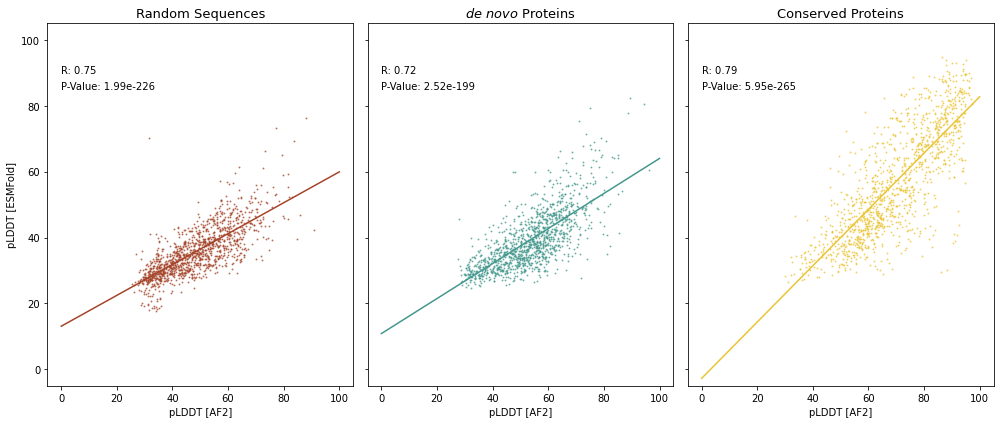

In [9]:
af2_ESM_pLDDT = pd.DataFrame()
af2_ESM_pLDDT["random_AF2"] = rd["max_pLDDT"]
af2_ESM_pLDDT["de_novo_AF2"] = dn["max_pLDDT"]
af2_ESM_pLDDT["established_proteins_AF2"] = est["pLDDT"]

af2_ESM_pLDDT["random_ESM"] = rd["pLDDT_ESM"]
af2_ESM_pLDDT["de_novo_ESM"] = dn["pLDDT_ESM"]
af2_ESM_pLDDT["established_proteins_ESM"] = est["pLDDT_ESM"]

af2_ESM_pLDDT = af2_ESM_pLDDT.dropna()

#plot scatterplots and correlations for pLDDT AF2 and pLDDT ESM
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6), sharey=True)

#plot scatterplots
ax1.scatter(af2_ESM_pLDDT["random_AF2"], af2_ESM_pLDDT["random_ESM"], s=1, alpha=0.6, c="#A44328")
ax2.scatter(af2_ESM_pLDDT["de_novo_AF2"], af2_ESM_pLDDT["de_novo_ESM"], s=1, alpha=0.6, c="#43978D")
ax3.scatter(af2_ESM_pLDDT["established_proteins_AF2"], af2_ESM_pLDDT["established_proteins_ESM"], s=1, alpha=0.6, c="#EAC435")

#calculate linear regression
slope_rd, intercept_rd, r_rd, p_rd, se_rd = linregress(af2_ESM_pLDDT["random_AF2"].dropna(), af2_ESM_pLDDT["random_ESM"].dropna())
slope_dn, intercept_dn, r_dn, p_dn, se_dn = linregress(af2_ESM_pLDDT["de_novo_AF2"].dropna(), af2_ESM_pLDDT["de_novo_ESM"].dropna())
slope_est, intercept_est, r_est, p_est, se_est = linregress(af2_ESM_pLDDT["established_proteins_AF2"].dropna(), af2_ESM_pLDDT["established_proteins_ESM"].dropna())

#plot linear regression
ax1.plot(np.arange(0,100, 1/len(af2_ESM_pLDDT["random_AF2"])), [slope_rd*x+intercept_rd for x in np.arange(0,100, 1/len(af2_ESM_pLDDT["random_AF2"]))], c="#A44328")
ax2.plot(np.arange(0,100, 1/len(af2_ESM_pLDDT["de_novo_AF2"])), [slope_dn*x+intercept_dn for x in np.arange(0,100, 1/len(af2_ESM_pLDDT["de_novo_AF2"]))], c="#43978D")
ax3.plot(np.arange(0,100, 1/len(af2_ESM_pLDDT["established_proteins_AF2"])), [slope_est*x+intercept_est for x in np.arange(0,100, 1/len(af2_ESM_pLDDT["established_proteins_AF2"]))], c="#EAC435")

#add correlation and p-value to plot
ax1.text(0, 90, f"R: {round(r_rd, 2)}")
ax1.text(0, 85, "P-Value: {:.2e}".format(p_rd))
ax2.text(0, 90, f"R: {round(r_dn, 2)}")
ax2.text(0, 85, "P-Value: {:.2e}".format(p_dn))
ax3.text(0, 90, f"R: {round(r_est, 2)}")
ax3.text(0, 85, "P-Value: {:.2e}".format(p_est))

#add titles
ax1.set_title("Random Sequences", fontdict={"size": 13})
ax2.set_title(r"$\it{de}$ $\it{novo}$ Proteins", fontdict={"size": 13})
ax3.set_title("Conserved Proteins", fontdict={"size": 13})

#add axis labels
ax1.set_xlabel("pLDDT [AF2]")
ax1.set_ylabel("pLDDT [ESMFold]")
ax2.set_xlabel("pLDDT [AF2]")
ax3.set_xlabel("pLDDT [AF2]")

#adjust y-scale to match x-scale
ax1.set_ylim(-5, 105)
ax1.set_xlim(-5, 105)
ax2.set_xlim(-5, 105)

ax1.set_ylim(-5, 105)
ax1.set_xlim(-5, 105)
ax2.set_xlim(-5, 105)

plt.tight_layout()


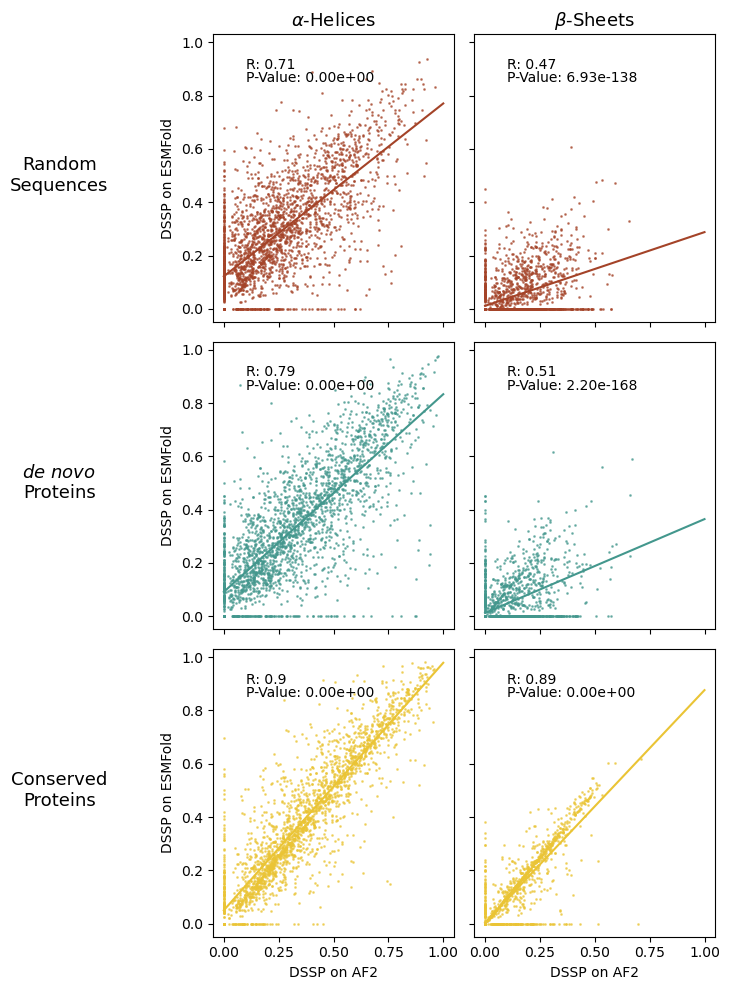

In [ ]:
def plot_subplot(ax, AF2, ESM, color):
    """
    Plot a subplot with scatter points, linear regression line, and text annotations.

    Args:
        ax: Axes object for the subplot.
        AF2: Data for the x-axis.
        ESM: Data for the y-axis.
        color: Color for scatter points and regression line.
    """
    # Create a DataFrame and populate it with AF2 and ESM data
    df = pd.DataFrame()
    df["AF2"] = AF2
    df["ESM"] = ESM

    # Remove rows with NaN values from the DataFrame
    df = df.dropna()

    # Perform linear regression and obtain slope, intercept, correlation coefficient (r),
    # p-value (p), and standard error (se)
    slope, intercept, r, p, se = linregress(df)

    # Generate y-values for the regression line using the slope and intercept
    yfit = [slope*x + intercept for x in np.arange(0, 1, 1/len(AF2))]

    # Scatter plot of AF2 vs. ESM with specified color, size, and transparency
    ax.scatter(AF2, ESM, color=color, s=1, alpha=0.6)

    # Plot the regression line using the generated y-values and specified color
    ax.plot(np.arange(0, 1, 1/len(AF2)), yfit, color=color)

    # Add text annotations for correlation coefficient (R) and p-value
    ax.text(0.1, 0.9, f"R: {round(r, 2)}")
    ax.text(0.1, 0.85, "P-Value: {:.2e}".format(p))

# Create a 3x2 grid of subplots with shared x-axis and y-axis
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(7.5, 10), sharex=True, sharey=True)

# Plot subplots for the "Random Sequences" group
plot_subplot(ax1, rd["alpha_content_AF"], rd["alpha_content_ESM"], color="#A44328")
plot_subplot(ax2, rd["beta_content_AF"], rd["beta_content_ESM"], color="#A44328")

# Plot subplots for the "de novo Proteins" group
plot_subplot(ax3, dn["alpha_content_AF"], dn["alpha_content_ESM"], color="#43978D")
plot_subplot(ax4, dn["beta_content_AF"], dn["beta_content_ESM"], color="#43978D")

# Plot subplots for the "Conserved Proteins" group
plot_subplot(ax5, est["alpha_content_AF"], est["alpha_content_ESM"], color="#EAC435")
plot_subplot(ax6, est["beta_content_AF"], est["beta_content_ESM"], color="#EAC435")

# Set titles for the first row of subplots
ax1.set_title(r"$\alpha$-Helices", fontdict={"size": 13})
ax2.set_title(r"$\beta$-Sheets", fontdict={"size": 13})

# Add text annotations for group names on the left side of each row
ax1.text(-0.75, 0.5, "Random\nSequences", ha="center", va="center", fontdict={"size": 13})
ax3.text(-0.75, 0.5, r"$\it{de}$ $\it{novo}$" +"\nProteins", ha="center", va="center", fontdict={"size": 13})
ax5.text(-0.75, 0.5, "Conserved\nProteins", ha="center", va="center",  fontdict={"size": 13})

# Add axis labels
ax1.set_ylabel("DSSP on ESMFold")
ax3.set_ylabel("DSSP on ESMFold")
ax5.set_ylabel("DSSP on ESMFold")

ax5.set_xlabel("DSSP on AF2")
ax6.set_xlabel("DSSP on AF2")


plt.tight_layout()